# Cars4U Project

## Introduction


In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. As sales of new cars slow down in the recent past, the pre-owned car market continues to grow larger than the new car market. Cars4U, a tech start-up aims to find the opportunity in the market. 

## Objective

The objective is to find a pricing model that can effectively predict the price of used cars, helping the business in developing profitable strategies using differential pricing.  

## Key Questions/Actions
- Explore dataset and extract insights using Exploratory Data Analysis.
- Build model, identify key variables with strong relationship with dependent variables.
- Perform Linear Regression tests.
-  Evaluate model to check model performance and scope improvement
- What conclusions do the test lead to?
- What reservations we have about the result? 

## Data Dictionary 
- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

### Import Packages
### Import/Read Dataset 

In [1]:
# Package nb_black has been loaded for good practice

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# To build linear regression_model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# get original csv file, including index, rows and columns
df = pd.read_csv("used_cars_data.csv")
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


### Preliminary Data Analysis

In [3]:
df.shape

(7253, 14)

##### Observations
- Dataset has a 7253 rows and 14 columns
  - Year: 2010 - 2016
  - Kilometers Driven: 36000 - 86999
  - Mileage: 11.36kmpl - 26.6kmpl
  - Power: 55.2bhp - 171.5bhp
  - Price: 1.75 - 17.74
  - Owner Type: First - Second
- Numerical data types have a large range. Some variables are 1000 times the other variables. This will influence the model's performance.
- Some categorical values will have tobe converted to numerical.

In [4]:
# check column types and number of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


##### Observations
- We will convert some object columns to categorical: Owner Type, Location, Fuel Type, Transmission.
- Some variables have less number of non-null values, there are some missing values.
- Replace missing values with median values for each variable.

Before replacing missing values, we will fix some variables first

In [5]:
# check for missing values in all columns
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

In [6]:
# A quick summary of the data columns
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
df['Location'] = df.Location.astype('category')
df['Owner_Type'] = df.Owner_Type.astype('category')
df['Fuel_Type'] = df.Fuel_Type.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   object  
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   object  
 9   Engine             7207 non-null   object  
 10  Power              7207 non-null   object  
 11  Seats              7200 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
dtypes: category(3), float64(2), int64(3), object(6)
memory usage: 645.5+ KB


In [8]:
df.head(80)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Audi A6 2.0 TDI Design Edition,Delhi,2014,56000,Diesel,Automatic,Second,18.53 kmpl,1968 CC,187.74 bhp,5.0,NaN,29.50
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00
77,77,Toyota Innova 2.0 G1,Chennai,2006,230000,Petrol,Manual,Third,12.4 kmpl,1998 CC,132 bhp,8.0,NaN,4.50
78,78,Toyota Innova 2.5 VX 7 STR BSIV,Hyderabad,2012,104000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,11.75


In [9]:
# Also replacing the categorical var with actual values
df['Location'] = df['Location'].replace({"Delhi": 'North', "Ahmedabad":'West', "Bangalore":'South', "Chennai":'East', 
                                         "Coimbatore":'South', "Hyderabad":'South', "Jaipur":'North', "Kochi":'South',
                                         "Kolkata":'East', "Mumbai":'West', "Pune":'West'})
df.head(80)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,West,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,West,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,East,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,East,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,South,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Audi A6 2.0 TDI Design Edition,North,2014,56000,Diesel,Automatic,Second,18.53 kmpl,1968 CC,187.74 bhp,5.0,NaN,29.50
76,76,Ford Fiesta 1.4 SXi TDCi,North,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00
77,77,Toyota Innova 2.0 G1,East,2006,230000,Petrol,Manual,Third,12.4 kmpl,1998 CC,132 bhp,8.0,NaN,4.50
78,78,Toyota Innova 2.5 VX 7 STR BSIV,South,2012,104000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,11.75


In [10]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)
df.head()

,S.No.,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Location_North,Location_South,Location_West
0,0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,0,1
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,0,1
2,2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,0,0
3,3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,0,1,0


In [11]:
df = pd.get_dummies(df, columns=['Owner_Type'], drop_first=True)
df.head()

,S.No.,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,New_Price,Price,Location_North,Location_South,Location_West,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,0,1,0,0,0
2,2,Honda Jazz V,2011,46000,Petrol,Manual,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,0,0,0,0,0
3,3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,0,0,0,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,0,1,0,0,1,0


In [12]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
df.head()

,S.No.,Name,Year,Kilometers_Driven,Transmission,Mileage,Engine,Power,Seats,New_Price,...,Location_North,Location_South,Location_West,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,Maruti Wagon R LXI CNG,2010,72000,Manual,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,...,0,0,1,0,0,0,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Manual,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,...,0,0,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,2011,46000,Manual,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,...,0,0,0,0,0,0,0,0,0,1
3,3,Maruti Ertiga VDI,2012,87000,Manual,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,...,0,0,0,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Automatic,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,...,0,1,0,0,1,0,1,0,0,0


In [13]:
df = pd.get_dummies(df, columns=['Transmission'], drop_first=True)
df.head()

,S.No.,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,...,Location_South,Location_West,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,...,0,1,0,0,0,0,0,0,0,1
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,...,0,1,0,0,0,1,0,0,0,1
2,2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,...,0,0,0,0,0,0,0,0,1,1
3,3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,...,0,0,0,0,0,1,0,0,0,1
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,...,1,0,0,1,0,1,0,0,0,0


In [14]:
# Normilizing numerical values with replace function
df['Mileage'] = df.Mileage.str.replace('km/kg?', '')
df['Mileage'] = df.Mileage.str.replace('kmpl?', '')
df['Engine'] = df.Engine.str.replace('CC?', '')
df['Power'] = df.Power.str.replace('bhp?', '')
df['Power'] = df.Power.str.replace('null bhp?', '')
df['Power'] = df.Power.str.replace('null?', '')
df['New_Price'] = df.New_Price.str.replace('Lakh?', '')
df['New_Price'] = df.New_Price.str.replace('Cr?', '')

df.head(80)

,S.No.,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,...,Location_South,Location_West,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,Maruti Wagon R LXI CNG,2010,72000,26.6,998,58.16,5.0,NaN,1.75,...,0,1,0,0,0,0,0,0,0,1
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582,126.2,5.0,NaN,12.50,...,0,1,0,0,0,1,0,0,0,1
2,2,Honda Jazz V,2011,46000,18.2,1199,88.7,5.0,8.61,4.50,...,0,0,0,0,0,0,0,0,1,1
3,3,Maruti Ertiga VDI,2012,87000,20.77,1248,88.76,7.0,NaN,6.00,...,0,0,0,0,0,1,0,0,0,1
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2,1968,140.8,5.0,NaN,17.74,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Audi A6 2.0 TDI Design Edition,2014,56000,18.53,1968,187.74,5.0,NaN,29.50,...,0,0,0,1,0,1,0,0,0,0
76,76,Ford Fiesta 1.4 SXi TDCi,2008,111111,17.8,1399,,5.0,NaN,2.00,...,0,0,0,0,0,1,0,0,0,1
77,77,Toyota Innova 2.0 G1,2006,230000,12.4,1998,132,8.0,NaN,4.50,...,0,0,0,0,1,0,0,0,1,1
78,78,Toyota Innova 2.5 VX 7 STR BSIV,2012,104000,12.8,2494,102,7.0,NaN,11.75,...,1,0,0,0,0,1,0,0,0,1


In [15]:
df = df.fillna("")
df = df.replace(r'^\s*$', np.NaN, regex=True)
df.head(80)

,S.No.,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,...,Location_South,Location_West,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,Maruti Wagon R LXI CNG,2010,72000,26.6,998,58.16,5.0,NaN,1.75,...,0,1,0,0,0,0,0,0,0,1
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582,126.2,5.0,NaN,12.50,...,0,1,0,0,0,1,0,0,0,1
2,2,Honda Jazz V,2011,46000,18.2,1199,88.7,5.0,8.61,4.50,...,0,0,0,0,0,0,0,0,1,1
3,3,Maruti Ertiga VDI,2012,87000,20.77,1248,88.76,7.0,NaN,6.00,...,0,0,0,0,0,1,0,0,0,1
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2,1968,140.8,5.0,NaN,17.74,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Audi A6 2.0 TDI Design Edition,2014,56000,18.53,1968,187.74,5.0,NaN,29.50,...,0,0,0,1,0,1,0,0,0,0
76,76,Ford Fiesta 1.4 SXi TDCi,2008,111111,17.8,1399,NaN,5.0,NaN,2.00,...,0,0,0,0,0,1,0,0,0,1
77,77,Toyota Innova 2.0 G1,2006,230000,12.4,1998,132,8.0,NaN,4.50,...,0,0,0,0,1,0,0,0,1,1
78,78,Toyota Innova 2.5 VX 7 STR BSIV,2012,104000,12.8,2494,102,7.0,NaN,11.75,...,1,0,0,0,0,1,0,0,0,1


In [16]:
df.median()

S.No.                         3626.00
Year                          2014.00
Kilometers_Driven            53416.00
Mileage                         18.16
Engine                        1493.00
Power                           94.00
Seats                            5.00
New_Price                       11.27
Price                            5.64
Location_North                   0.00
Location_South                   0.00
Location_West                    0.00
Owner_Type_Fourth & Above        0.00
Owner_Type_Second                0.00
Owner_Type_Third                 0.00
Fuel_Type_Diesel                 1.00
Fuel_Type_Electric               0.00
Fuel_Type_LPG                    0.00
Fuel_Type_Petrol                 0.00
Transmission_Manual              1.00
dtype: float64

In [17]:
# Replacing missing values in new price with Media
# Converting New Price column from object data type to float
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Seats'] = df['Seats'].fillna(df['Seats'].median())
df['Engine'] = df['Engine'].fillna(df['Engine'].median())
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())
df['Power'] = df['Power'].fillna(df['Power'].median())

df['Mileage'] = df['Mileage'].astype('float64')
df['Engine'] = df['Engine'].astype('float64')
df['Power'] = df['Power'].astype('float64')

df.head(80)

,S.No.,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,...,Location_South,Location_West,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,Maruti Wagon R LXI CNG,2010,72000,26.60,998.0,58.16,5.0,NaN,1.75,...,0,1,0,0,0,0,0,0,0,1
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,NaN,12.50,...,0,1,0,0,0,1,0,0,0,1
2,2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5.0,8.61,4.50,...,0,0,0,0,0,0,0,0,1,1
3,3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,NaN,6.00,...,0,0,0,0,0,1,0,0,0,1
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,NaN,17.74,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Audi A6 2.0 TDI Design Edition,2014,56000,18.53,1968.0,187.74,5.0,NaN,29.50,...,0,0,0,1,0,1,0,0,0,0
76,76,Ford Fiesta 1.4 SXi TDCi,2008,111111,17.80,1399.0,94.00,5.0,NaN,2.00,...,0,0,0,0,0,1,0,0,0,1
77,77,Toyota Innova 2.0 G1,2006,230000,12.40,1998.0,132.00,8.0,NaN,4.50,...,0,0,0,0,1,0,0,0,1,1
78,78,Toyota Innova 2.5 VX 7 STR BSIV,2012,104000,12.80,2494.0,102.00,7.0,NaN,11.75,...,1,0,0,0,0,1,0,0,0,1


In [18]:
# check for missing values in all columns
df.isnull().sum().sort_values(ascending=False)

New_Price                    6247
Transmission_Manual             0
Price                           0
Name                            0
Year                            0
Kilometers_Driven               0
Mileage                         0
Engine                          0
Power                           0
Seats                           0
Location_North                  0
Fuel_Type_Petrol                0
Location_South                  0
Location_West                   0
Owner_Type_Fourth & Above       0
Owner_Type_Second               0
Owner_Type_Third                0
Fuel_Type_Diesel                0
Fuel_Type_Electric              0
Fuel_Type_LPG                   0
S.No.                           0
dtype: int64

##### Observations
- No missing values. 
- All missing values were replaced with their respective median value for the variable. 
- Since New Price is missing more than 50% of the values it is not a significant variable so we will be dropping it.

In [19]:
# check the number of unique values in each column of the dataframe
df.nunique()

S.No.                        7253
Name                         2041
Year                           23
Kilometers_Driven            3660
Mileage                       438
Engine                        150
Power                         383
Seats                           9
New_Price                     625
Price                        1373
Location_North                  2
Location_South                  2
Location_West                   2
Owner_Type_Fourth & Above       2
Owner_Type_Second               2
Owner_Type_Third                2
Fuel_Type_Diesel                2
Fuel_Type_Electric              2
Fuel_Type_LPG                   2
Fuel_Type_Petrol                2
Transmission_Manual             2
dtype: int64

In [20]:
# Dropping/ignorign Name
df = df.drop ('Name', axis=1)

In [21]:
# Dropping/ignoring New Price
df = df.drop ('New_Price', axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   S.No.                      7253 non-null   int64  
 1   Year                       7253 non-null   int64  
 2   Kilometers_Driven          7253 non-null   int64  
 3   Mileage                    7253 non-null   float64
 4   Engine                     7253 non-null   float64
 5   Power                      7253 non-null   float64
 6   Seats                      7253 non-null   float64
 7   Price                      7253 non-null   float64
 8   Location_North             7253 non-null   uint8  
 9   Location_South             7253 non-null   uint8  
 10  Location_West              7253 non-null   uint8  
 11  Owner_Type_Fourth & Above  7253 non-null   uint8  
 12  Owner_Type_Second          7253 non-null   uint8  
 13  Owner_Type_Third           7253 non-null   uint8

<AxesSubplot:>

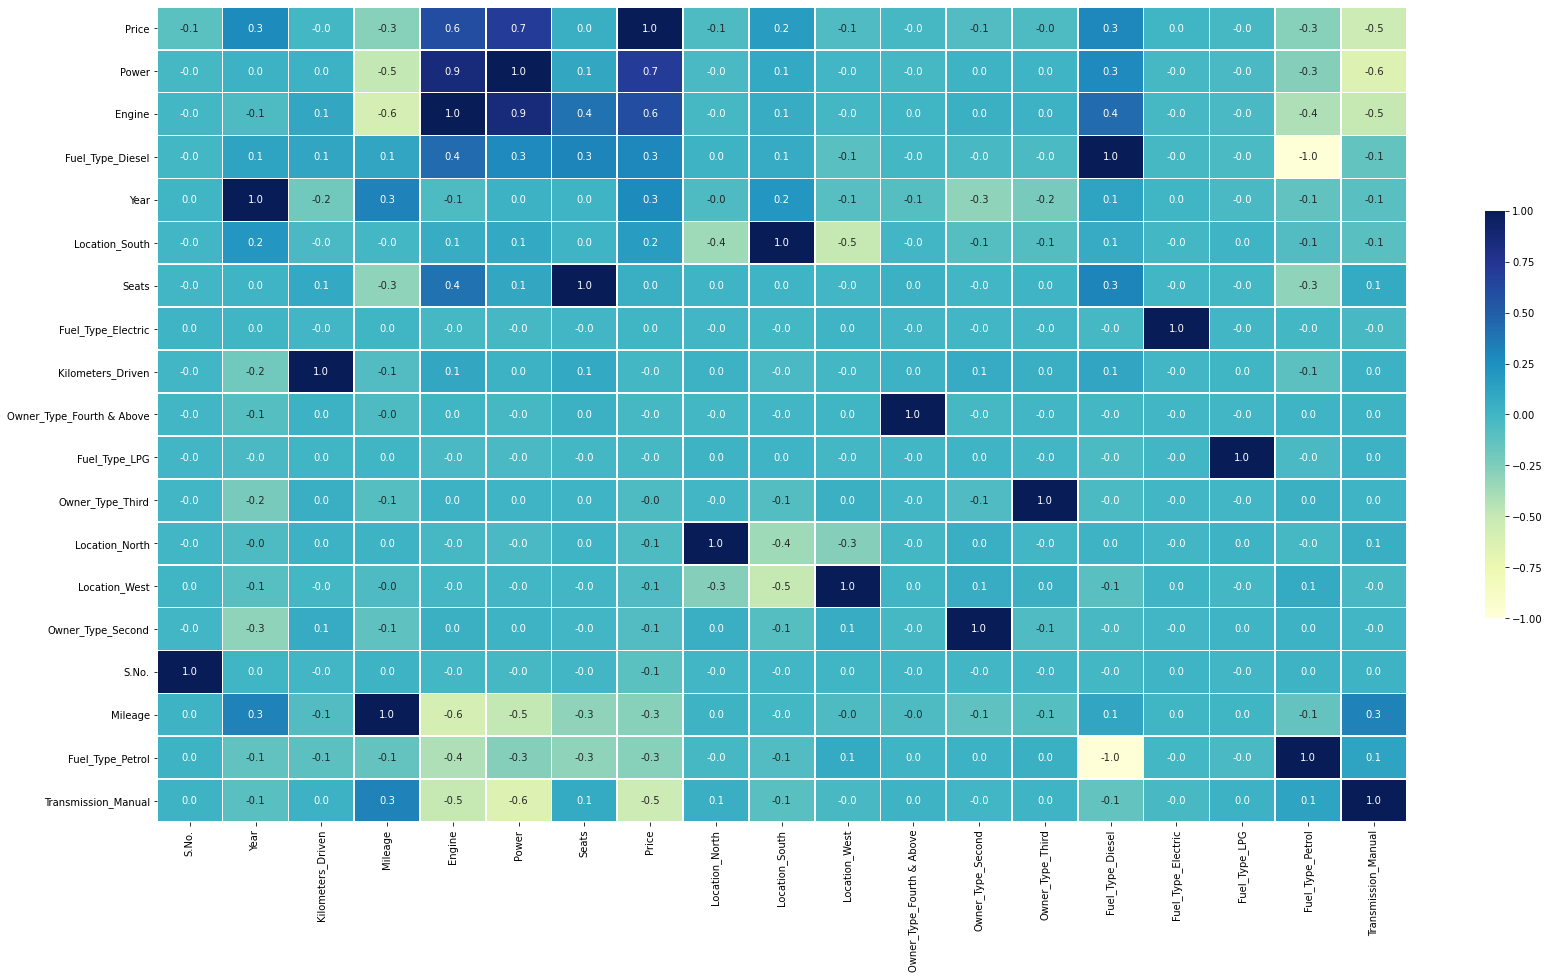

In [22]:
# Creating heatmap for all numerical values to determin 
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = (
    df[numeric_columns].corr().sort_values(by=["Price"], ascending=False)
)  # sorting correlations w.r.t Price

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

In [23]:
X=df.drop(["Price"], axis=1)
vif = pd.DataFrame()
vif["Variables"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                    Variables  vif_Factor
0                       S.No.    4.006441
1                        Year  319.194461
2           Kilometers_Driven    1.539753
3                     Mileage   38.527972
4                      Engine   64.387075
5                       Power   32.899626
6                       Seats   75.142150
7              Location_North    1.942657
8              Location_South    3.380071
9               Location_West    2.647103
10  Owner_Type_Fourth & Above    1.008544
11          Owner_Type_Second    1.235766
12           Owner_Type_Third    1.044226
13           Fuel_Type_Diesel   64.954789
14         Fuel_Type_Electric    1.037248
15              Fuel_Type_LPG    1.203001
16           Fuel_Type_Petrol   57.181847
17        Transmission_Manual    6.337631


In [24]:
df['Year'] = pd.to_datetime(df['Year'], format="%Y")
today = pd.to_datetime('today')
df['Car_Age'] = today.year - df['Year'].dt.year

df.head()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_North,Location_South,Location_West,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Car_Age
0,0,2010-01-01,72000,26.60,998.0,58.16,5.0,1.75,0,0,1,0,0,0,0,0,0,0,1,11
1,1,2015-01-01,41000,19.67,1582.0,126.20,5.0,12.50,0,0,1,0,0,0,1,0,0,0,1,6
2,2,2011-01-01,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,0,0,0,0,1,1,10
3,3,2012-01-01,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,0,0,0,1,0,0,0,1,9
4,4,2013-01-01,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,1,0,1,0,0,0,0,8


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   S.No.                      7253 non-null   int64         
 1   Year                       7253 non-null   datetime64[ns]
 2   Kilometers_Driven          7253 non-null   int64         
 3   Mileage                    7253 non-null   float64       
 4   Engine                     7253 non-null   float64       
 5   Power                      7253 non-null   float64       
 6   Seats                      7253 non-null   float64       
 7   Price                      7253 non-null   float64       
 8   Location_North             7253 non-null   uint8         
 9   Location_South             7253 non-null   uint8         
 10  Location_West              7253 non-null   uint8         
 11  Owner_Type_Fourth & Above  7253 non-null   uint8         
 12  Owner_

In [26]:
X=df.drop(["Price", "Year", "Seats","Fuel_Type_Diesel", 
           "Fuel_Type_Electric", "Fuel_Type_LPG", "Fuel_Type_Petrol","Power"], axis=1)
vif = pd.DataFrame()
vif["Variables"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                    Variables  vif_Factor
0                       S.No.    3.890440
1           Kilometers_Driven    1.557348
2                     Mileage   10.057569
3                      Engine    6.969875
4              Location_North    1.872422
5              Location_South    3.159102
6               Location_West    2.457701
7   Owner_Type_Fourth & Above    1.012650
8           Owner_Type_Second    1.342292
9            Owner_Type_Third    1.095918
10        Transmission_Manual    4.624801
11                    Car_Age    7.284575


##### Observations
- All variables have a vif =10 or <10

In [27]:
# Dropping/ignoring Fuel Type Deisel
df = df.drop('Year', axis=1)
# Dropping/ignoring Power
df = df.drop('Seats', axis=1)
# Dropping/ignoring Seats
df = df.drop('Fuel_Type_Diesel', axis=1)
# Dropping/ignoring Mileage
df = df.drop('Fuel_Type_Electric', axis=1)
# Dropping/ignoring Mileage
df = df.drop('Fuel_Type_LPG', axis=1)
# Dropping/ignoring Mileage
df = df.drop('Fuel_Type_Petrol', axis=1)
# Dropping/ignoring Mileage
df = df.drop('Power', axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   S.No.                      7253 non-null   int64  
 1   Kilometers_Driven          7253 non-null   int64  
 2   Mileage                    7253 non-null   float64
 3   Engine                     7253 non-null   float64
 4   Price                      7253 non-null   float64
 5   Location_North             7253 non-null   uint8  
 6   Location_South             7253 non-null   uint8  
 7   Location_West              7253 non-null   uint8  
 8   Owner_Type_Fourth & Above  7253 non-null   uint8  
 9   Owner_Type_Second          7253 non-null   uint8  
 10  Owner_Type_Third           7253 non-null   uint8  
 11  Transmission_Manual        7253 non-null   uint8  
 12  Car_Age                    7253 non-null   int64  
dtypes: float64(3), int64(3), uint8(7)
memory usage: 

##### Observations
- These are the final variables we will use for the model.

## Exploratory Data Analysis
### Uni-variate Analysis

In [29]:
# User defined function that will output a combination of a boxplot and a histogram for a numerical input. 
def hist_boxplot(feature, figsize=(20, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="blue"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="red", linestyle="-"
    )  # Add median to the histogram

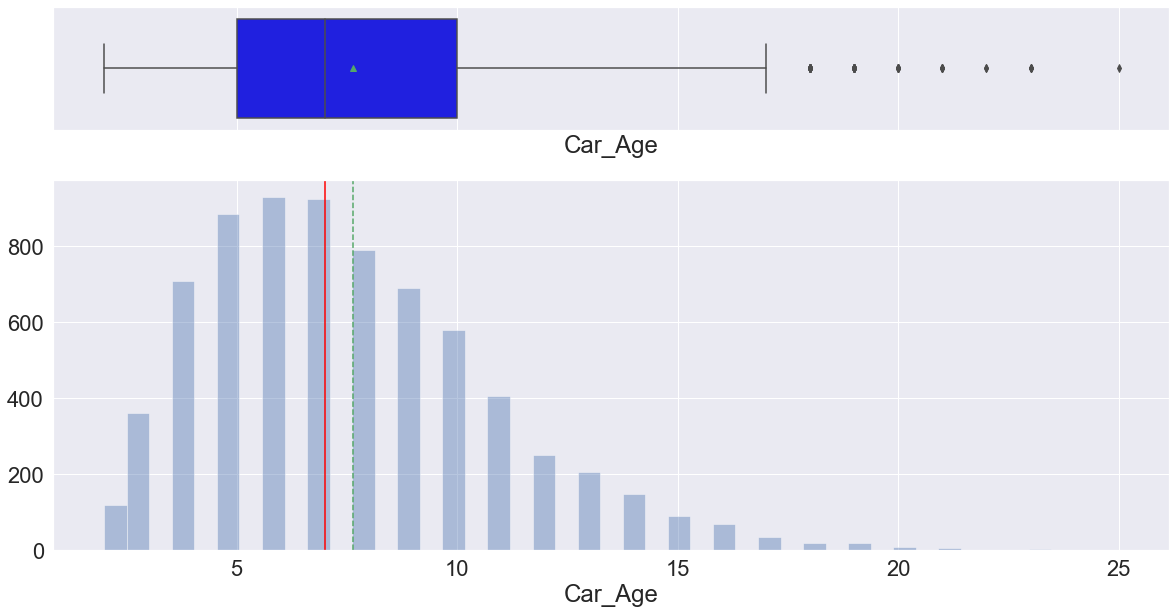

In [30]:
hist_boxplot(df['Car_Age'])

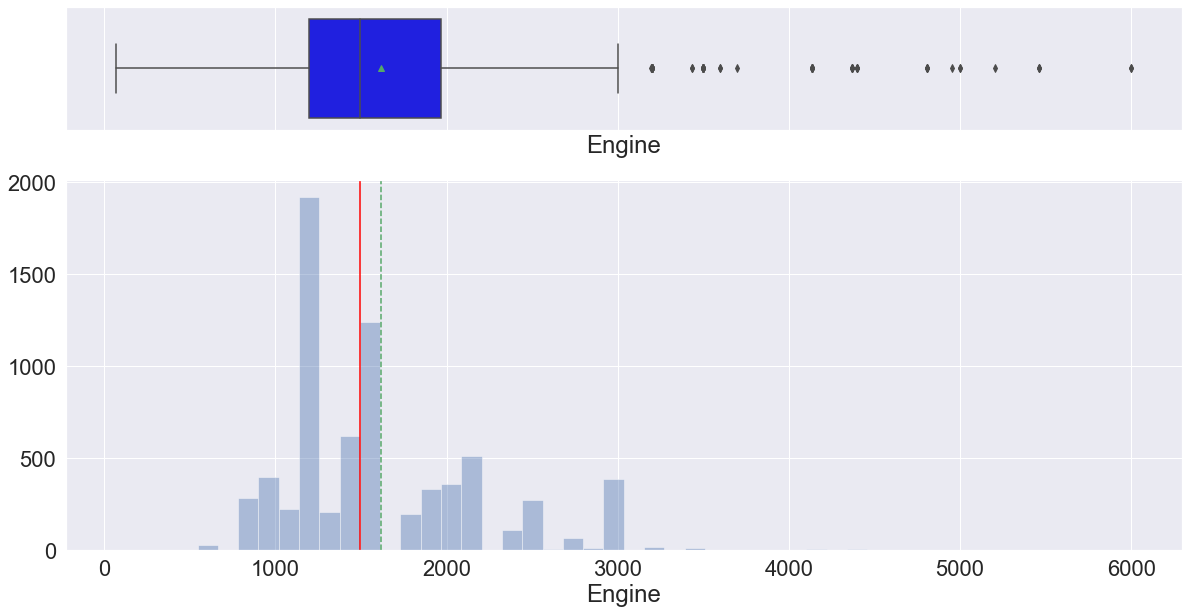

In [31]:
hist_boxplot(df['Engine'])

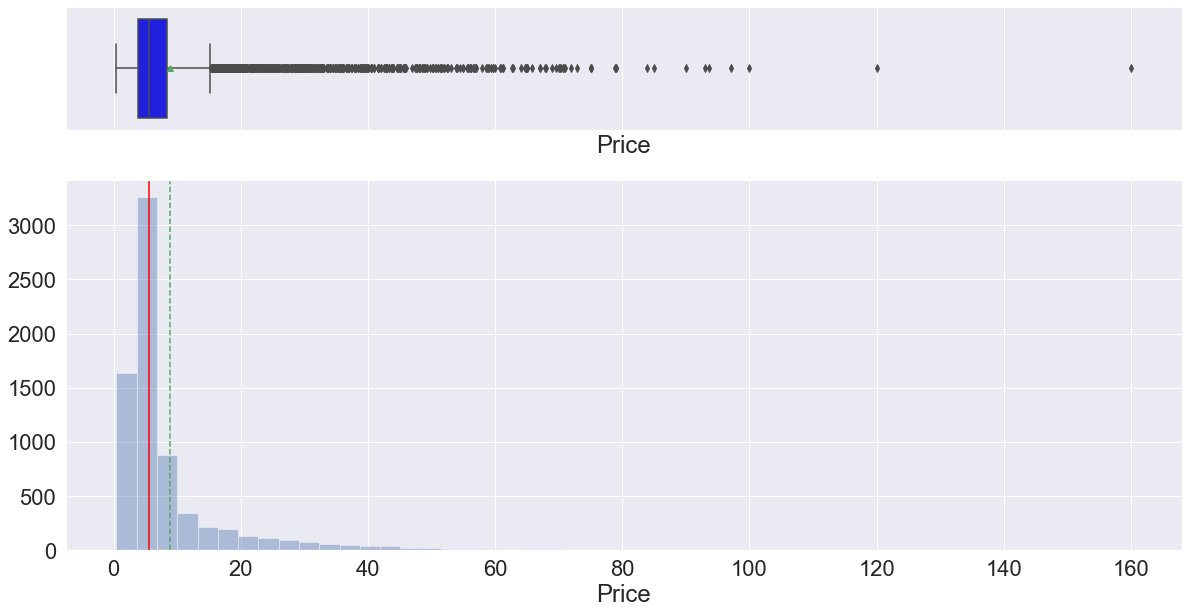

In [32]:
hist_boxplot(df['Price'])

##### Observations
- Older cars seem to be more popular with clients. The distribution for Car Age is left-skewed. 
- The median Car Age being purchased is around 7 years old.
- The median engine in cars is about 100 CC. The distribution is left-skewed.
- The median for price in used cars is about 5 Lakh or Cr. The distribution is left-skewed. There are many outliers.

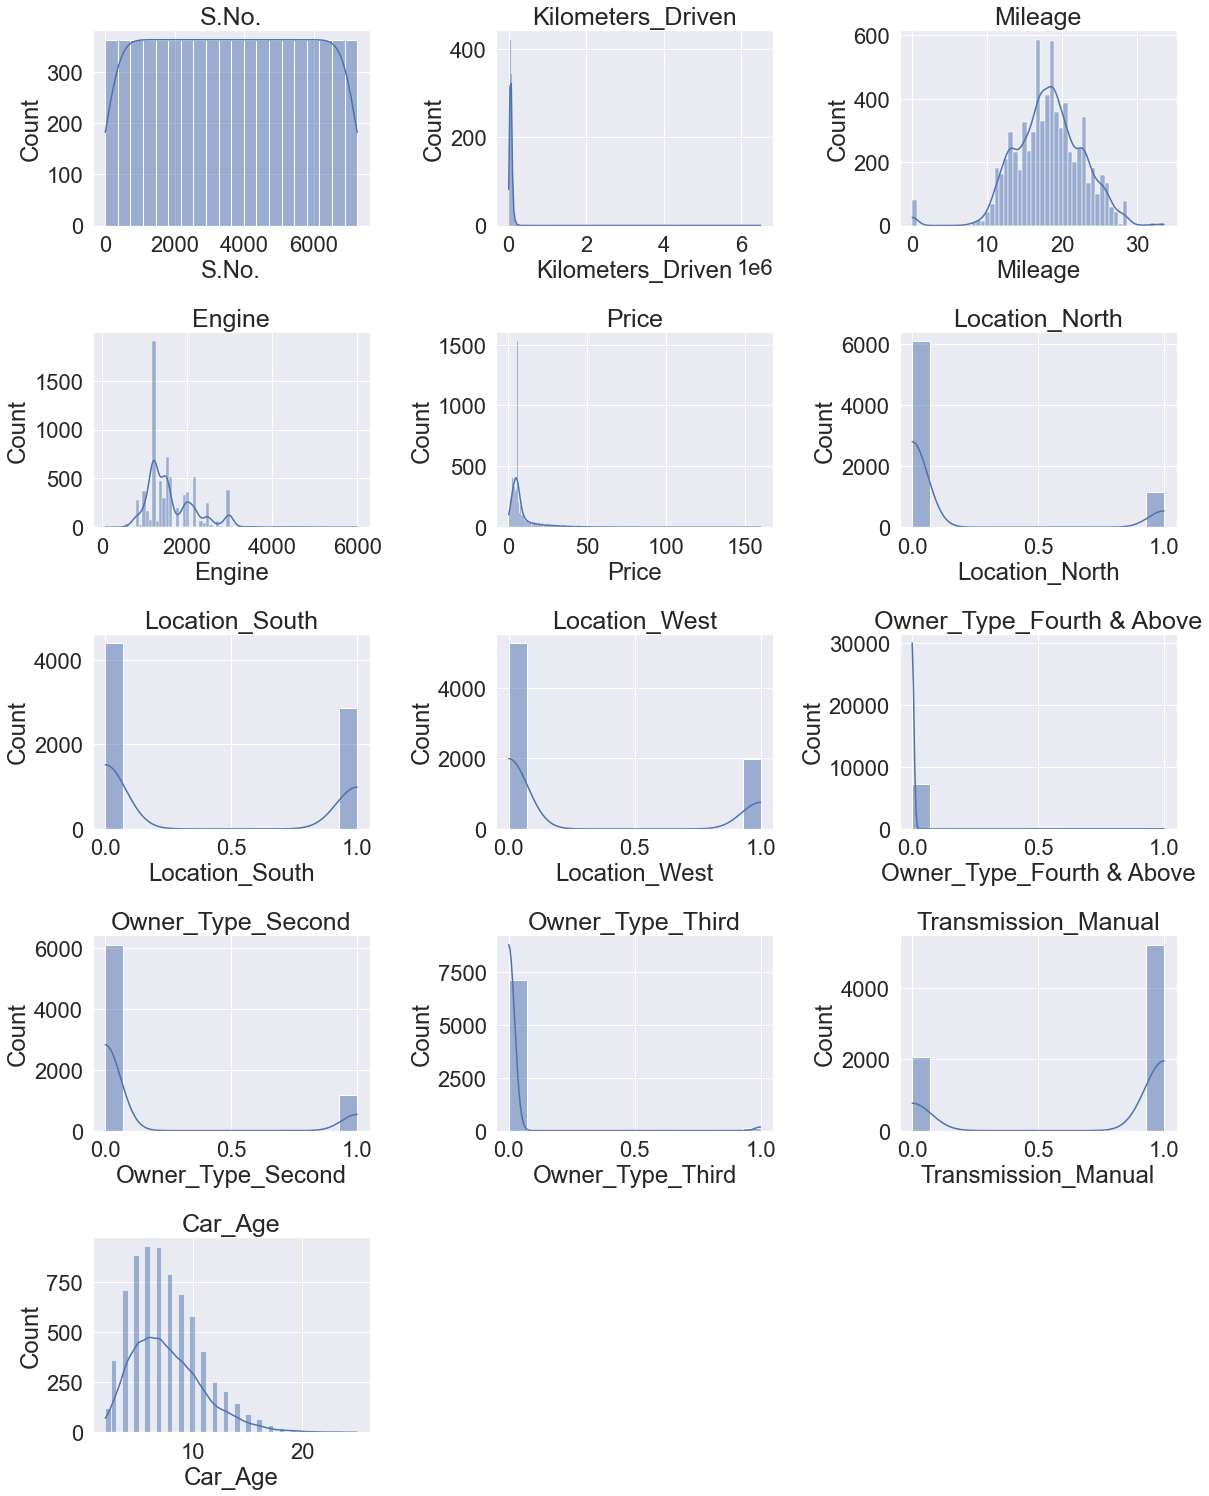

In [33]:
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    sns.histplot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

##### Observations
- Mileage is somewhat normal distributed.
- All other values are left skewed, except for manual transmission an year.
- Interpretation of left skewed graphs:
    - Kilometers_Driven, Engine, Power, New_Price, Price: used cars with low numbers for kilometers driven, engine, power and price are popular with customers. 
- Interpretation of right skewed graph:
    - Mileage: used cars that save more gas per mile are popular with customers.
    
### Bi-Variate Analysis

In [34]:
df[df.columns[:]].corr()["Price"][:]

S.No.                       -0.106400
Kilometers_Driven           -0.011062
Mileage                     -0.278190
Engine                       0.601519
Price                        1.000000
Location_North              -0.050064
Location_South               0.173176
Location_West               -0.061167
Owner_Type_Fourth & Above   -0.019603
Owner_Type_Second           -0.064990
Owner_Type_Third            -0.049989
Transmission_Manual         -0.532651
Car_Age                     -0.276009
Name: Price, dtype: float64

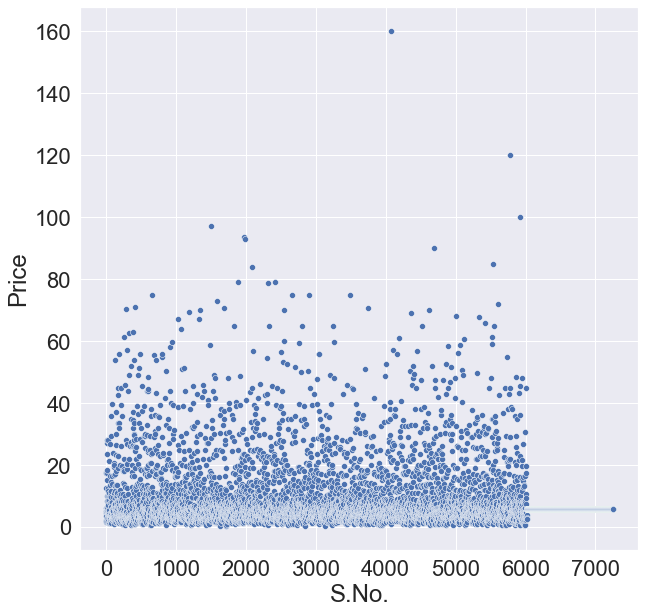

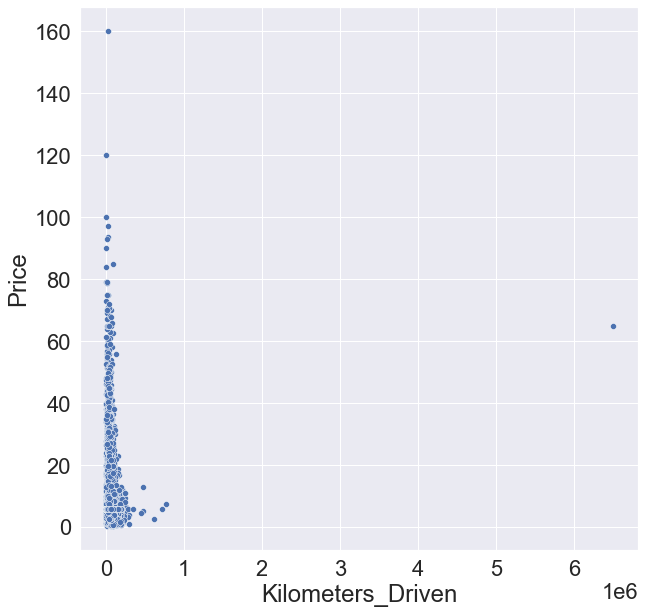

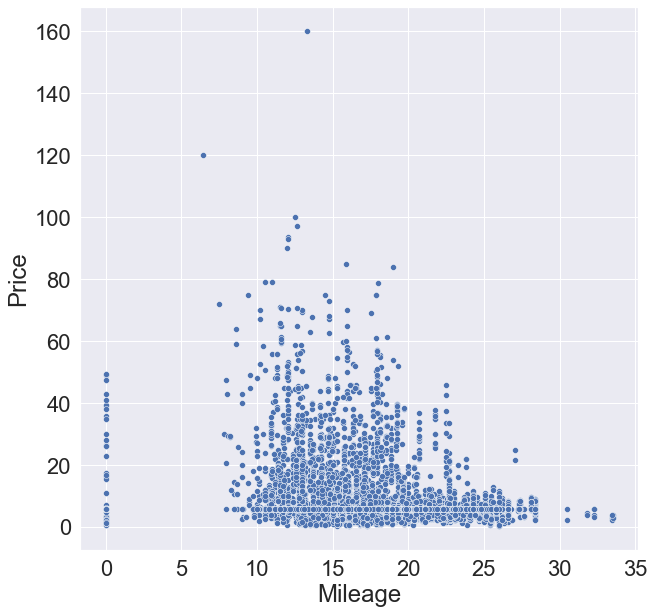

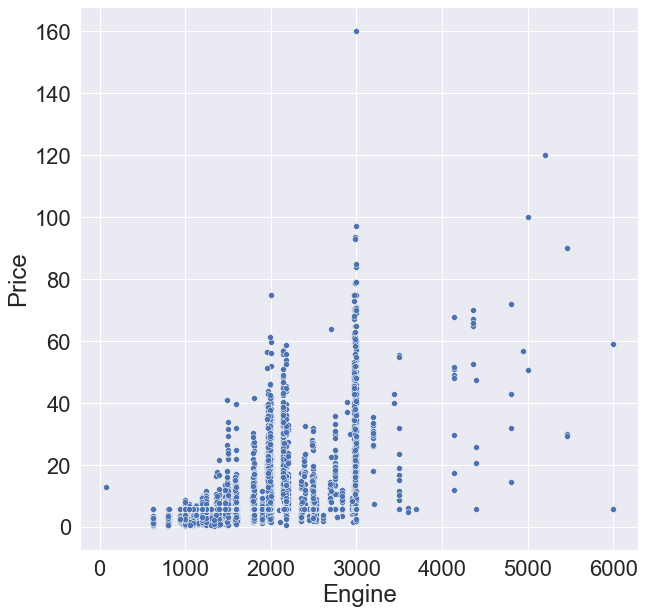

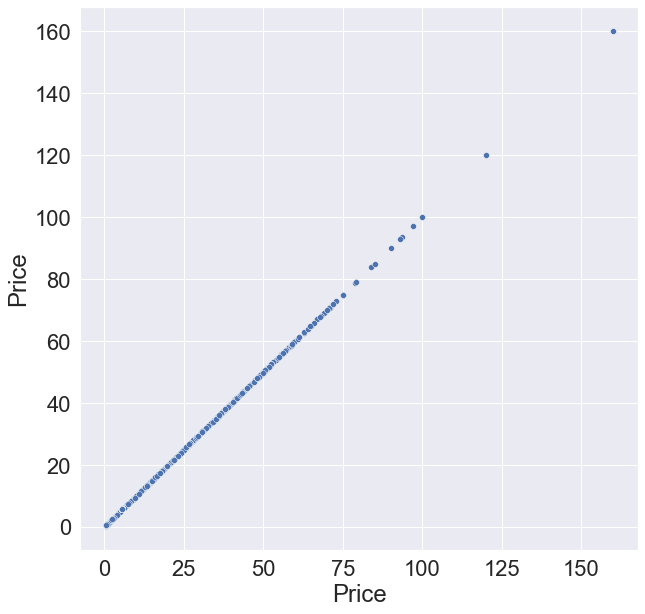

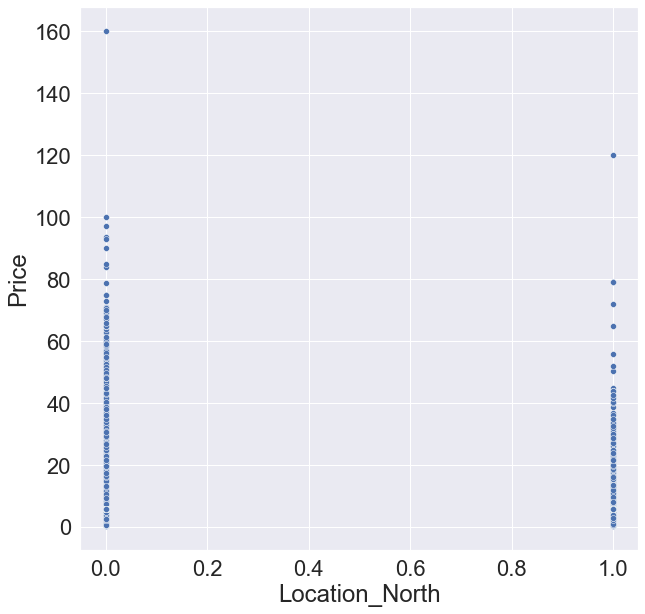

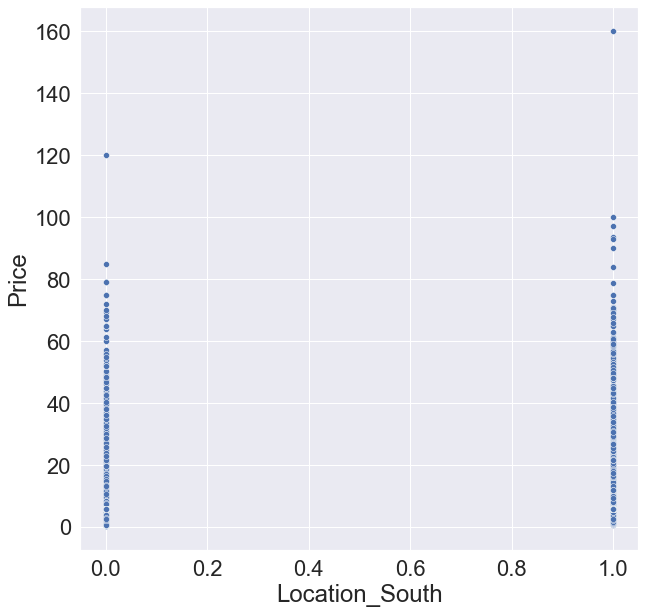

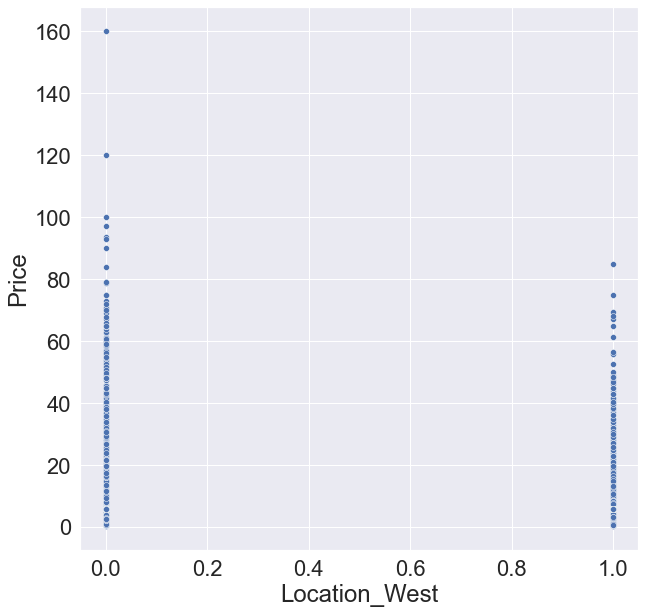

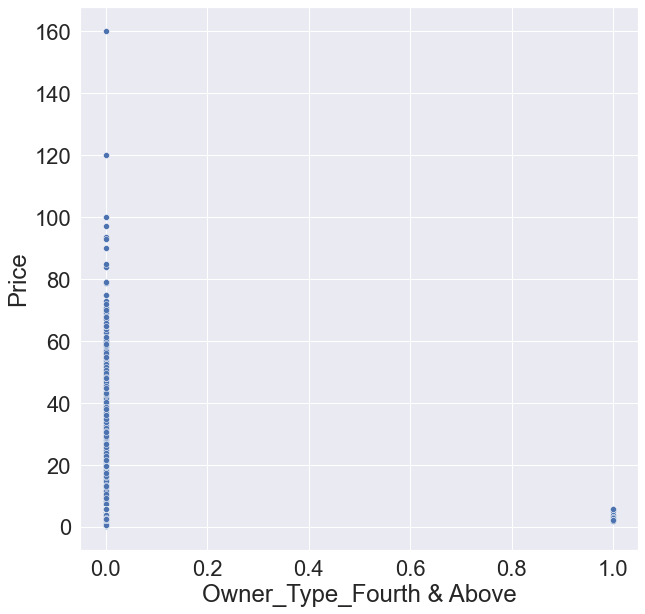

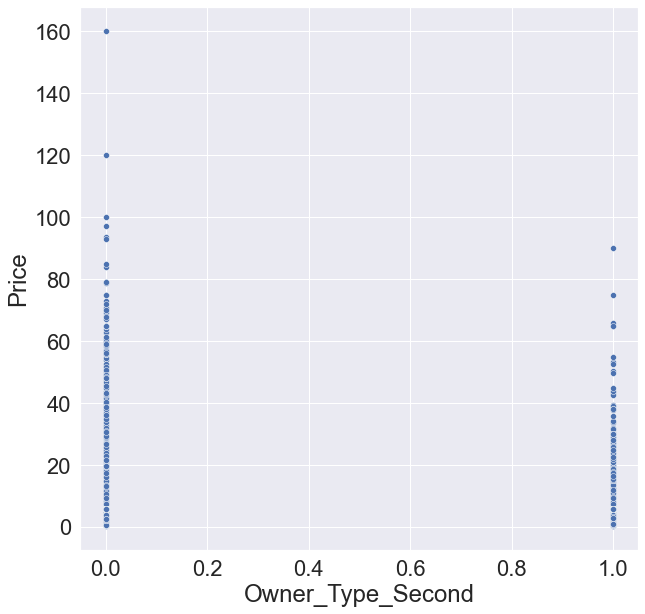

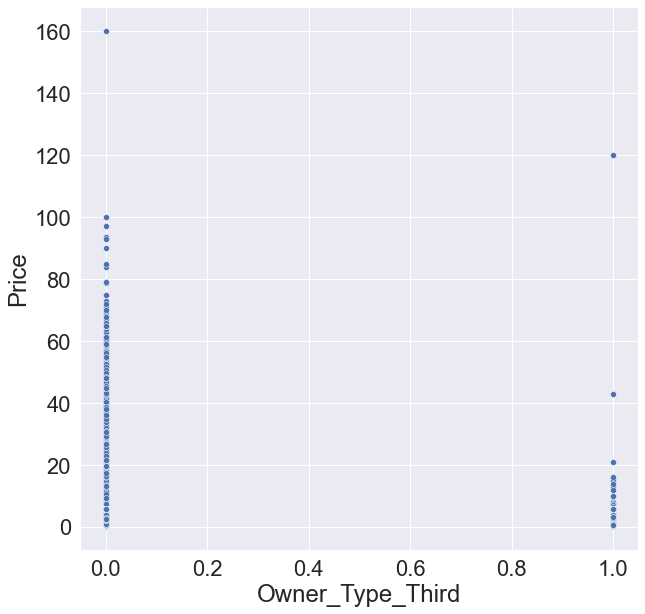

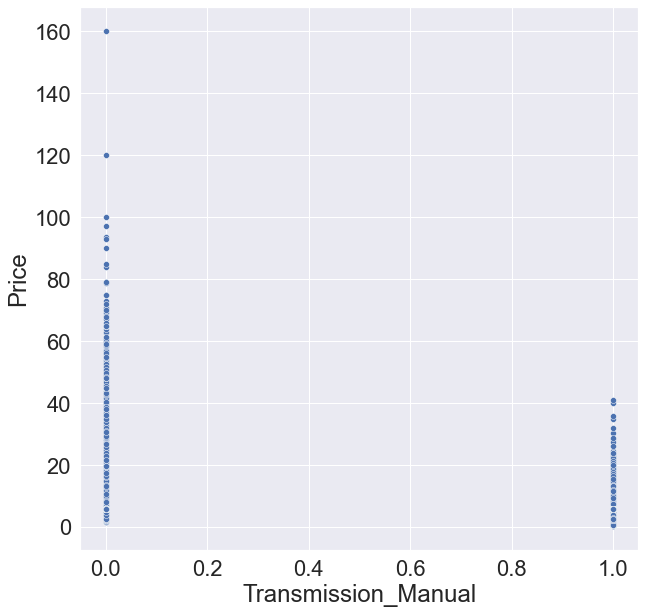

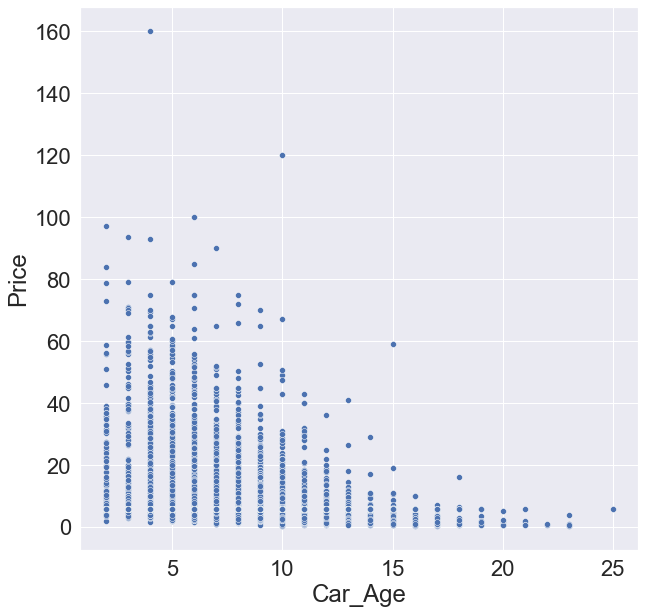

In [35]:
#Bivariate Scatterplot of Prices with all the features
for i in df.columns:
    plt.figure(figsize = (10,10))
    sns.scatterplot(x = df[i], y = df['Price'])
    plt.show()   

### Multi-Variate Analysis

<AxesSubplot:>

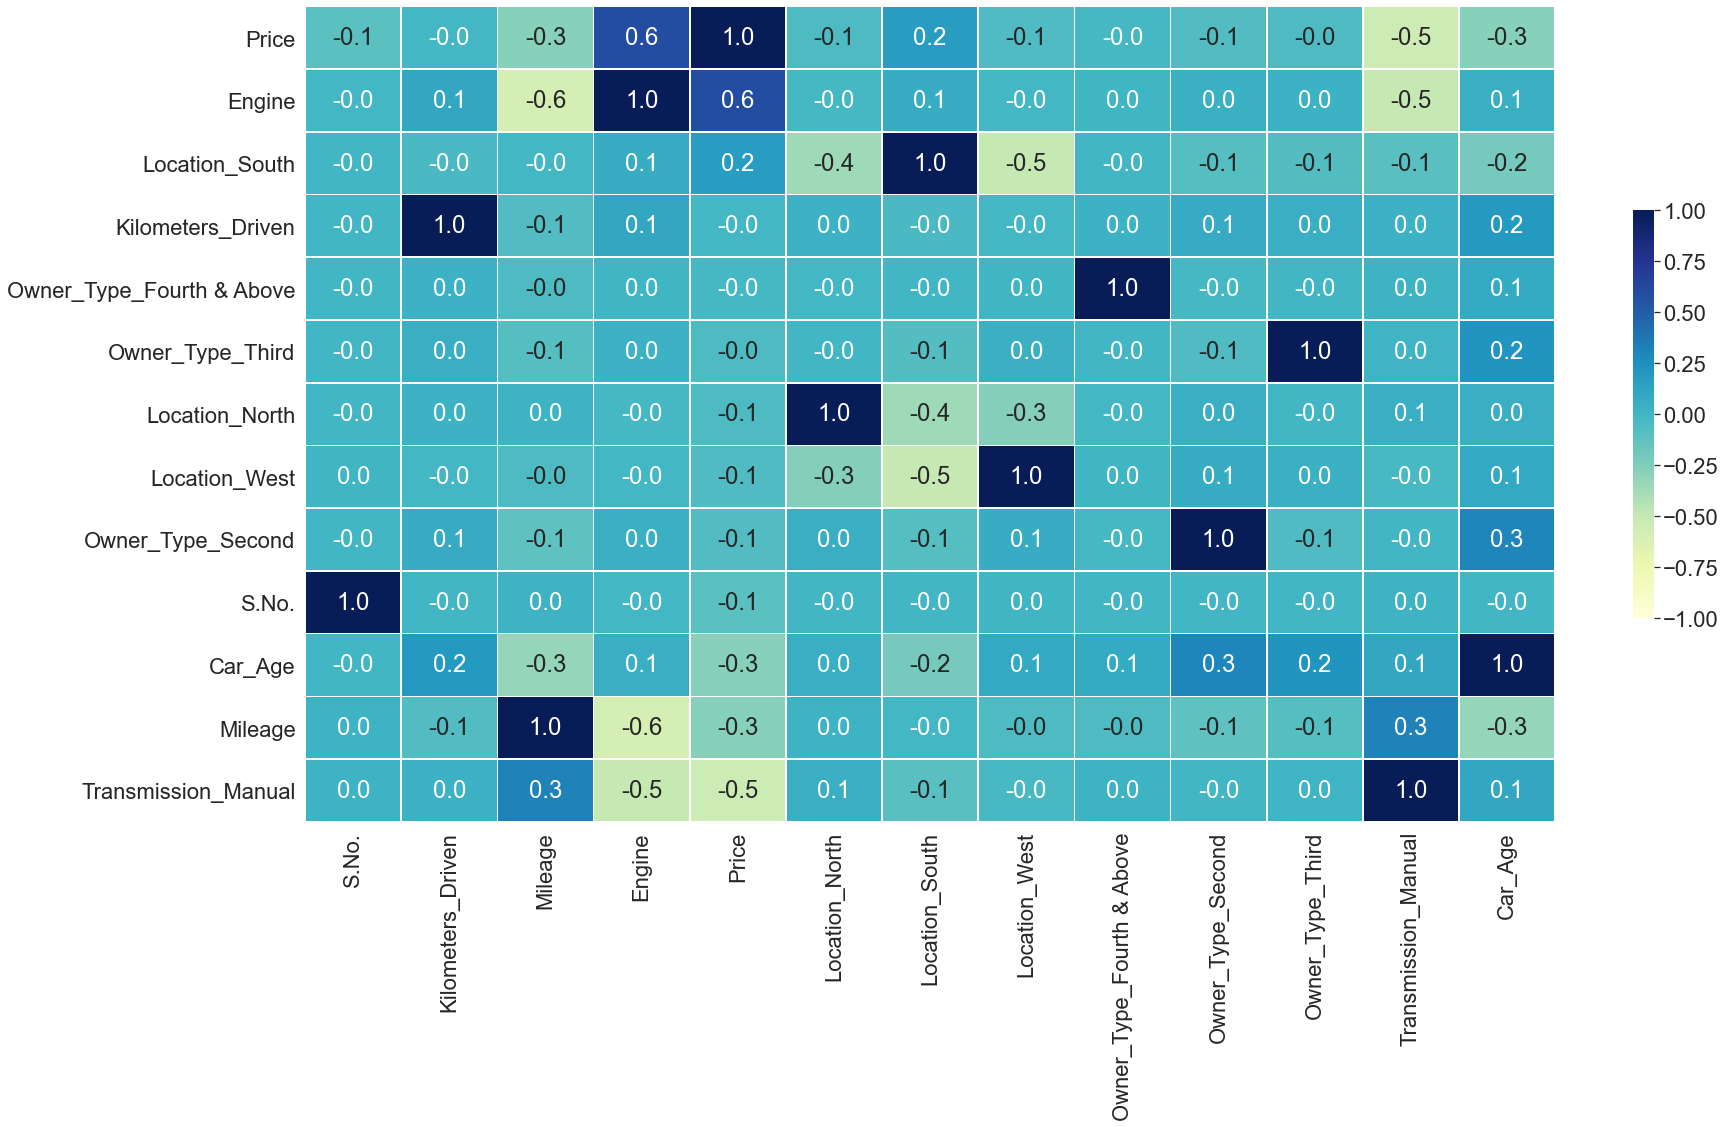

In [36]:
# Creating heatmap for all numerical values to determin with respect to Price
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = (
    df[numeric_columns].corr().sort_values(by=["Price"], ascending=False)
)  # sorting correlations w.r.t Price

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

##### Observations
- Price is highly correlated with Engine.
- Price is moderately correlated with Location South.
- Price has a negative relationship with Mileage, Transmission Manual, Car Age.
- As Car Age increases the price for the car decreases.
- Cars with manual transmission have a lower price. 

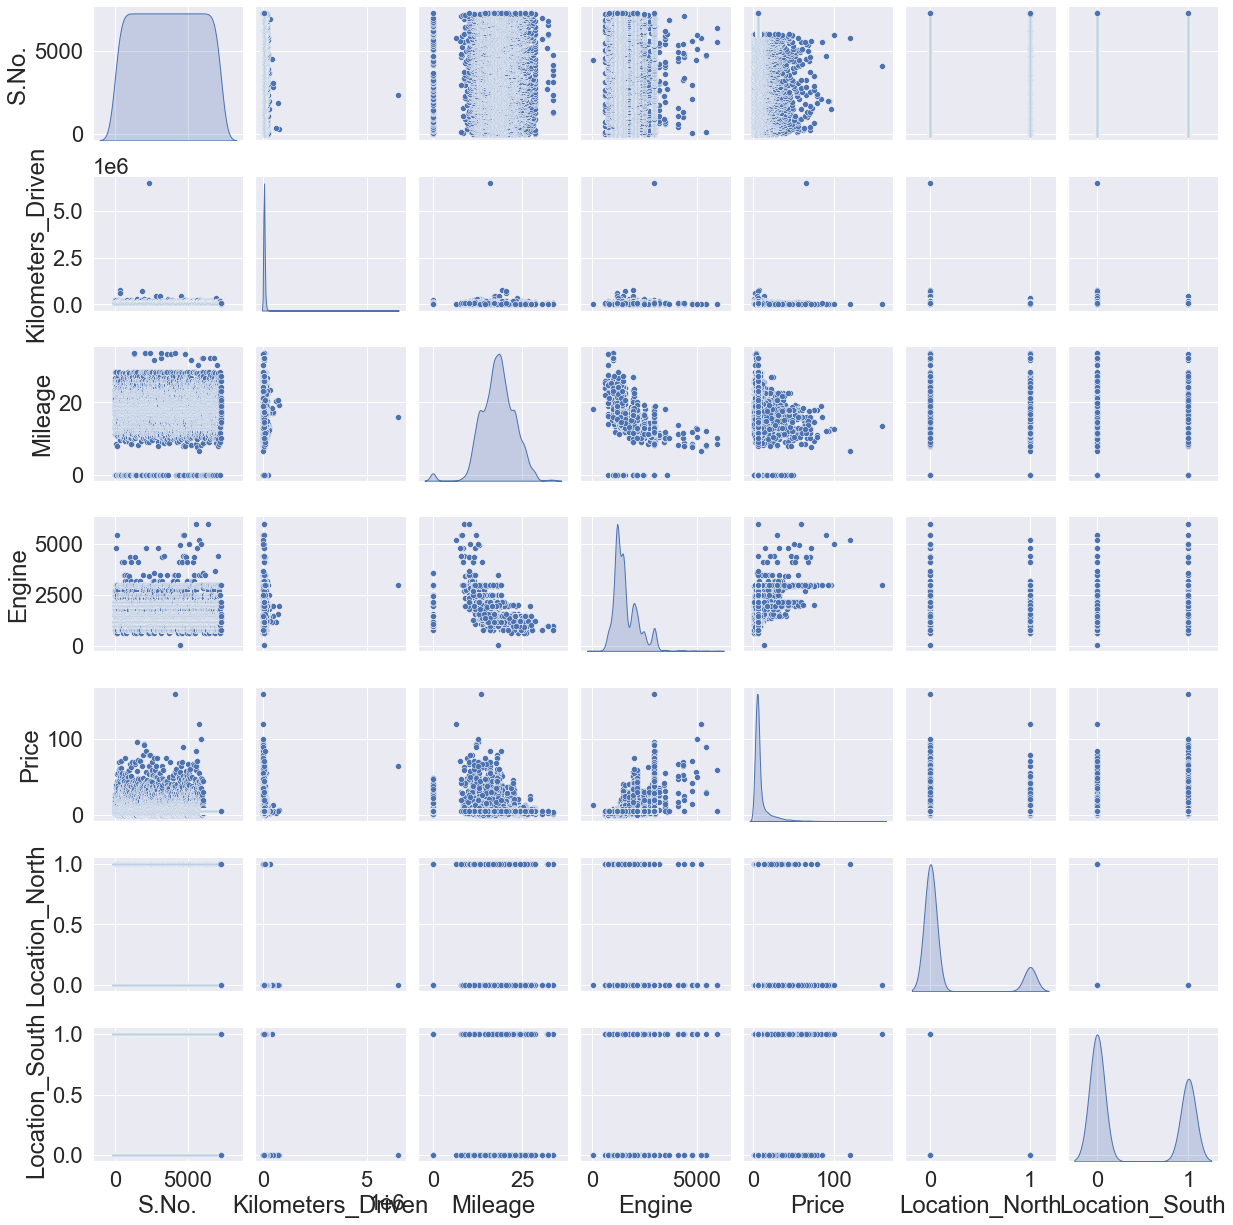

In [37]:
df_attr = df.iloc[:, 0:7]
sns.pairplot(df_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

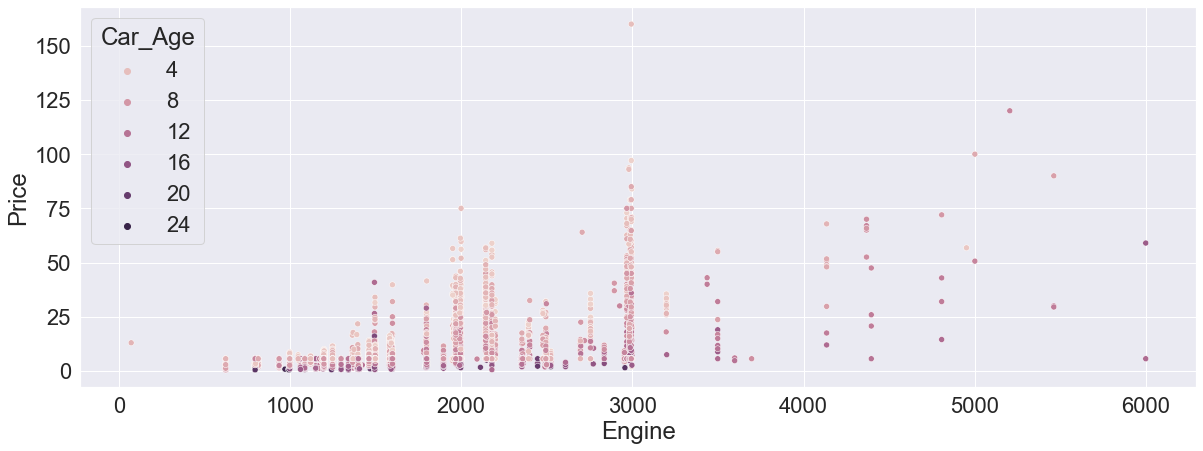

In [38]:
plt.figure(figsize=(20, 7))
sns.scatterplot(y="Price", x="Engine", hue="Car_Age", data=df, ci=None);

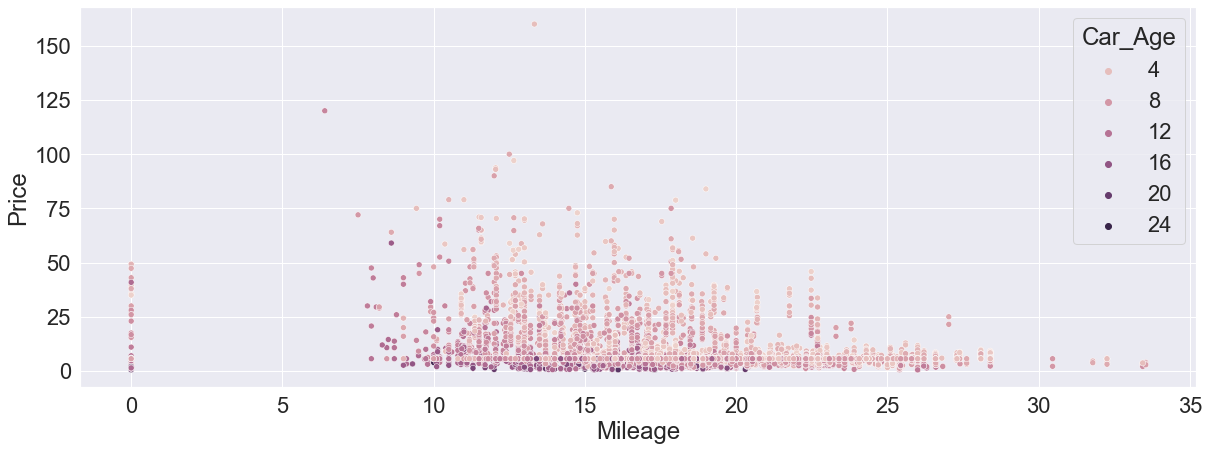

In [39]:
plt.figure(figsize=(20, 7))
sns.scatterplot(y="Price", x="Mileage", hue="Car_Age", data=df, ci=None);

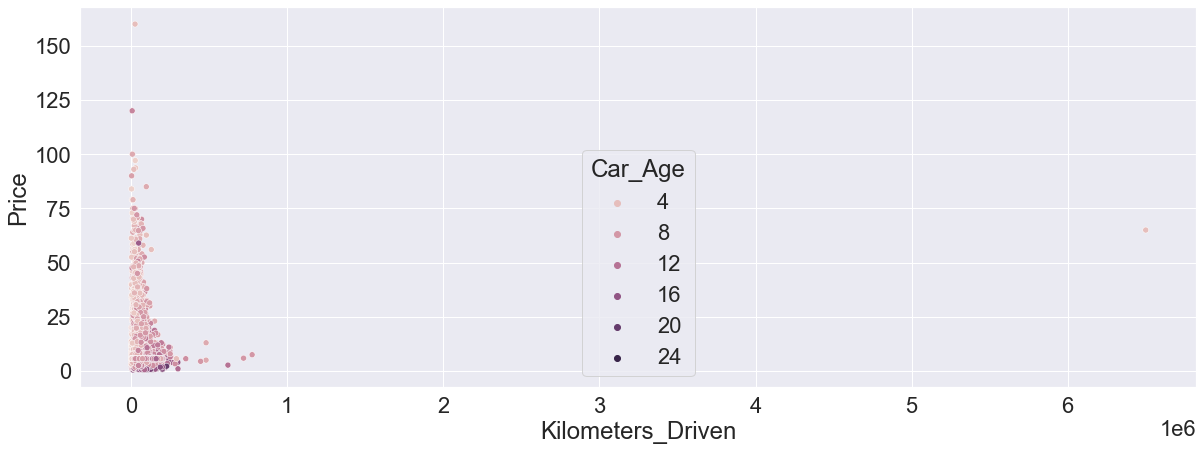

In [40]:
plt.figure(figsize=(20, 7))
sns.scatterplot(y="Price", x="Kilometers_Driven", hue="Car_Age", data=df, ci=None);

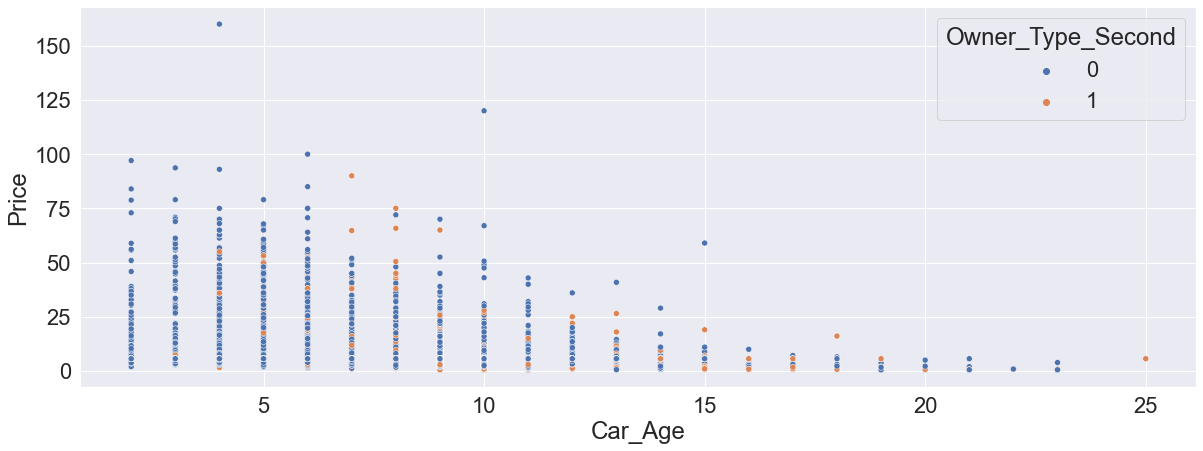

In [41]:
plt.figure(figsize=(20, 7))
sns.scatterplot(y="Price", x="Car_Age", hue="Owner_Type_Second", data=df, ci=None);

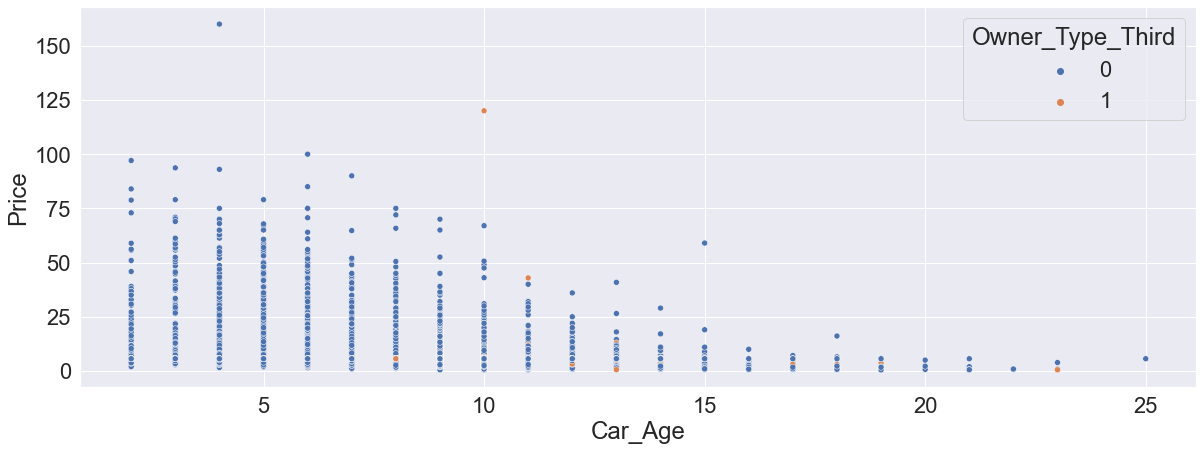

In [43]:
plt.figure(figsize=(20, 7))
sns.scatterplot(y="Price", x="Car_Age", hue="Owner_Type_Third", data=df, ci=None);

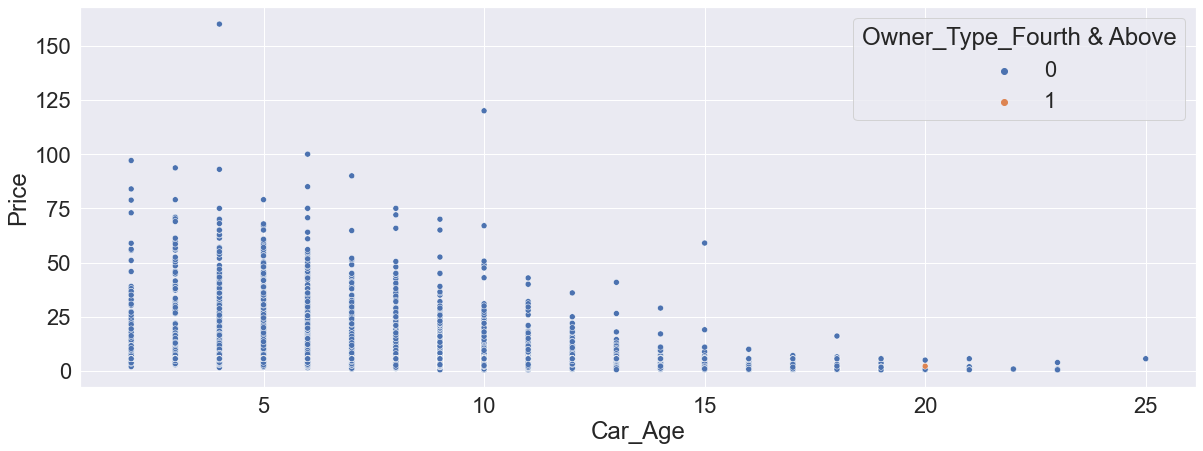

In [44]:
plt.figure(figsize=(20, 7))
sns.scatterplot(y="Price", x="Car_Age", hue="Owner_Type_Fourth & Above", data=df, ci=None);

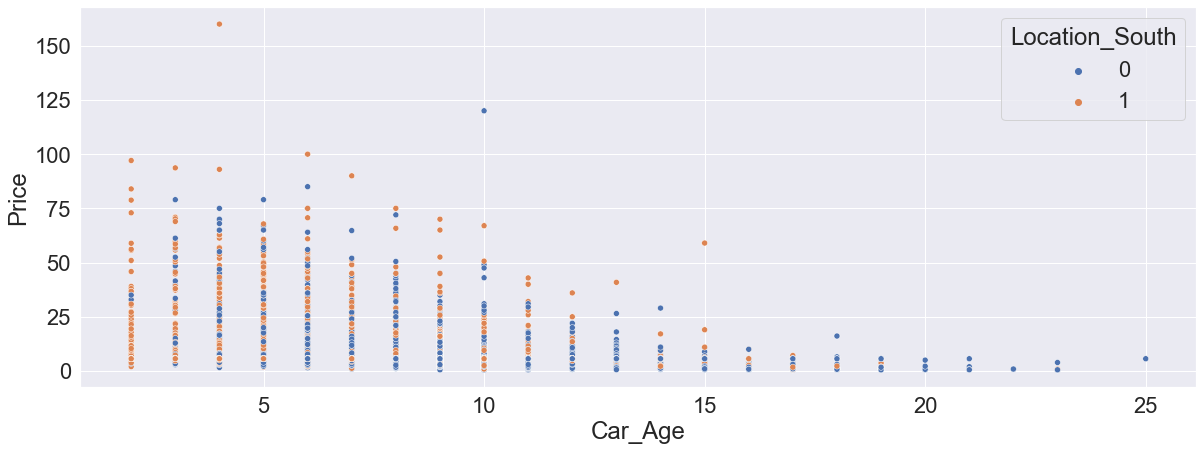

In [45]:
plt.figure(figsize=(20, 7))
sns.scatterplot(y="Price", x="Car_Age", hue="Location_South", data=df, ci=None);

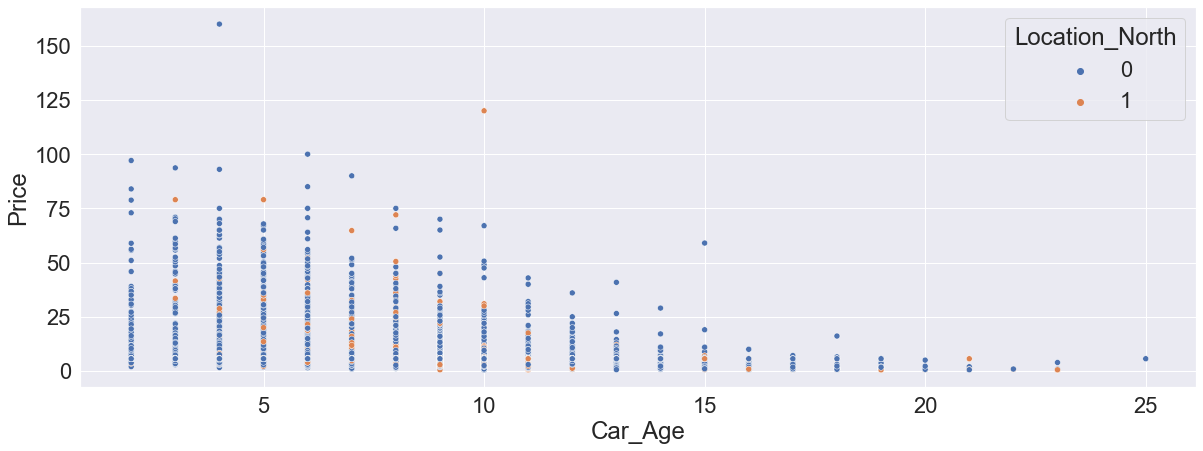

In [46]:
plt.figure(figsize=(20, 7))
sns.scatterplot(y="Price", x="Car_Age", hue="Location_North", data=df, ci=None);

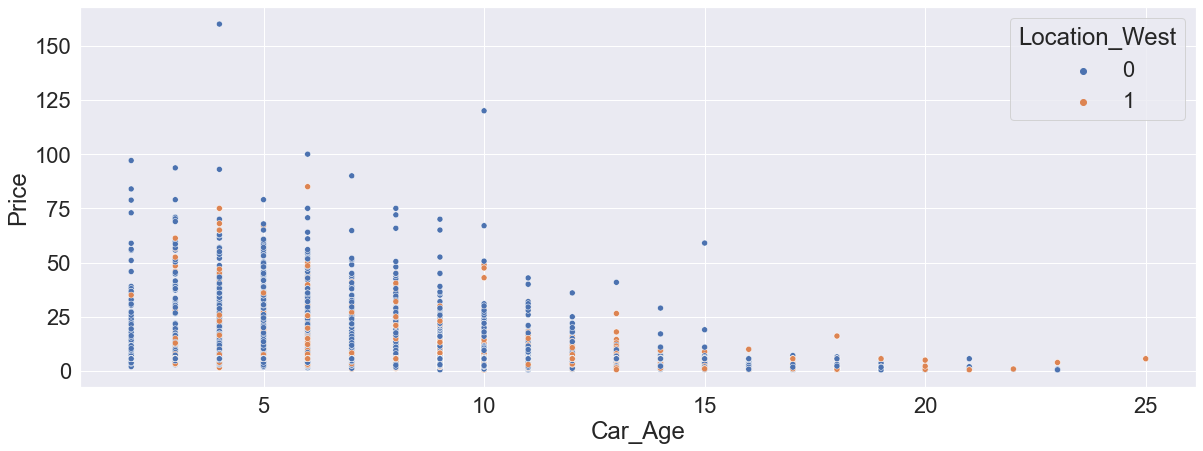

In [47]:
plt.figure(figsize=(20, 7))
sns.scatterplot(y="Price", x="Car_Age", hue="Location_West", data=df, ci=None);

### Dealing with Outliers

In [48]:
# Detecting Outliers with IQR
np.random.seed(42)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)

def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.045
0.123


##### Observations
- With the normal data this only flags 4.5% of the points as suspicious, but with the lognormal data over 12.3% of the sample is flagged.
- Price has a lot of outliers to the right, therefore, these points are not being considered in the calculations for the overall distribution of the data.

In [49]:
# Evaluating quartiles for Price
quartiles = np.quantile(df['Price'][df['Price'].notnull()], [.25, .75])
price_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {price_4iqr}')
outlier_price = df.loc[np.abs(df['Price'] - df['Price'].median()) > price_4iqr, 'Price']
outlier_price

Q1 = 3.85, Q3 = 8.4, 4*IQR = 18.200000000000003


13      27.00
19      28.00
38      28.00
62      26.70
67      35.67
        ...  
5927    45.52
5946    48.00
5970    26.76
5996    30.54
6008    45.00
Name: Price, Length: 553, dtype: float64

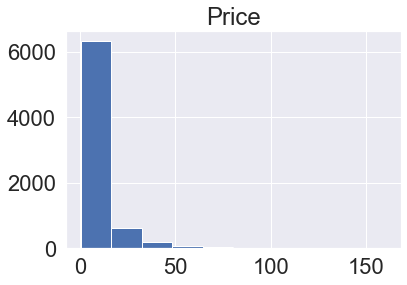

0


In [50]:
# log transformation for Price
cols_to_log = ['Price']
for colname in cols_to_log:
    plt.hist(df[colname], bins=10)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

#### Observations
- Log transformation did not help with skewed data

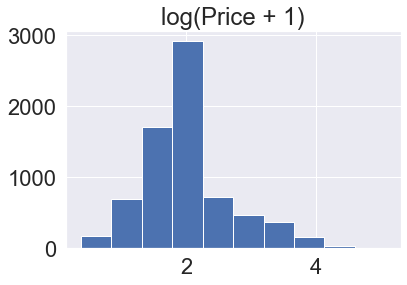

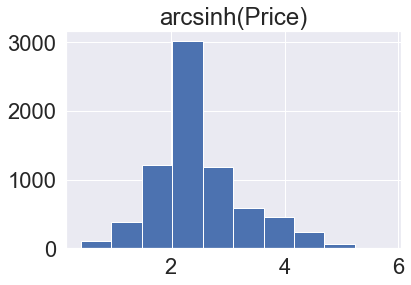

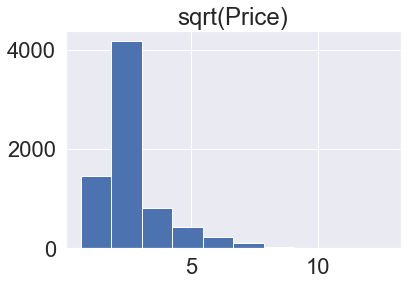

In [51]:
# log, arcsinh, sqrt analysis for Price
plt.hist(np.log(df['Price'] + 1))
plt.title('log(Price + 1)')
plt.show()
plt.hist(np.arcsinh(df['Price']))
plt.title('arcsinh(Price)')
plt.show()
plt.hist(np.sqrt(df['Price']))
plt.title('sqrt(Price)')
plt.show()

In [52]:
# Include column for Price log
for colname in cols_to_log:
    df[colname + '_arcsinh'] = np.arcsinh(df[colname] + 1)
df.drop(cols_to_log, axis=1, inplace=True)
df

,S.No.,Kilometers_Driven,Mileage,Engine,Location_North,Location_South,Location_West,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Transmission_Manual,Car_Age,Price_arcsinh
0,0,72000,26.60,998.0,0,0,1,0,0,0,1,11,1.736278
1,1,41000,19.67,1582.0,0,0,1,0,0,0,1,6,3.297206
2,2,46000,18.20,1199.0,0,0,0,0,0,0,1,10,2.406059
3,3,87000,20.77,1248.0,0,0,0,0,0,0,1,9,2.644121
4,4,40670,15.20,1968.0,0,1,0,0,1,0,0,8,3.624519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,89411,20.54,1598.0,0,1,0,0,0,0,1,10,2.591882
7249,7249,59000,17.21,1197.0,0,0,1,0,0,0,0,6,2.591882
7250,7250,28000,23.08,1461.0,0,0,0,0,0,0,1,9,2.591882
7251,7251,52262,17.20,1197.0,0,0,1,0,0,1,0,8,2.591882


##### Observations
- Arcsinh and Log transformations are very similar. I would rather choose arcsinh but for the sake of the client, log transformation is preferred.
- Chose Arcsinh transformation because it will present more accurate values for our modeland client's benefit. Arcsinh transformation decreases the scale of the distribution, with a huge range of Price. The outliers caused the arcsinh-transformed distributions to still be slightly skewed to the left. However, it is closer to a normal distribution that before. 

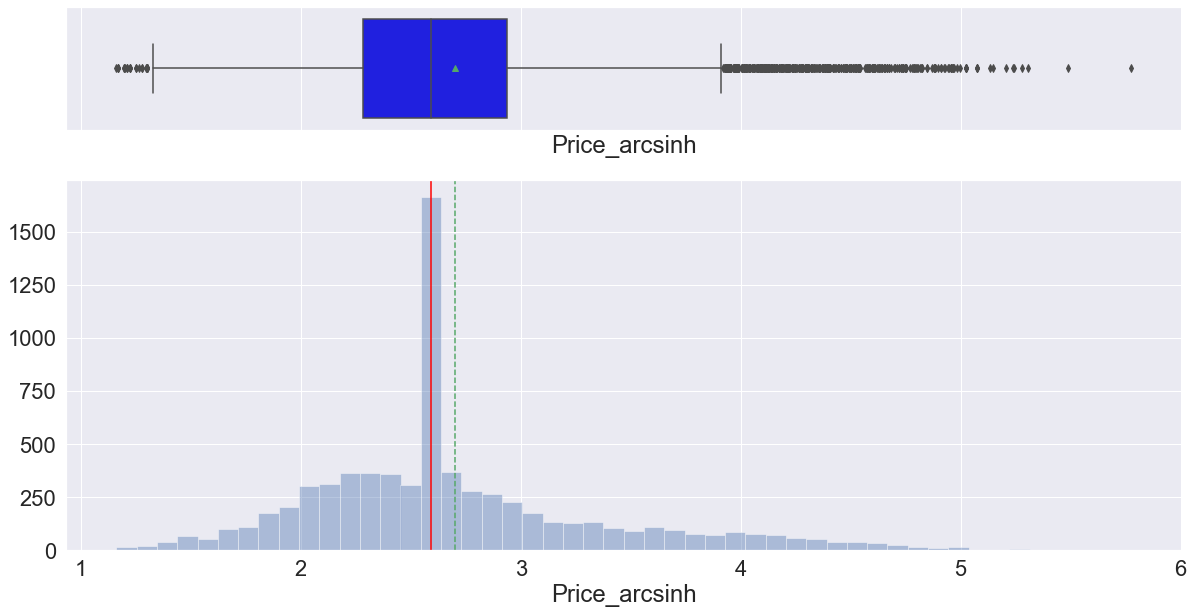

In [53]:
hist_boxplot(df['Price_arcsinh'])

In [54]:
# Evaluating quartiles for Price_log
quartiles = np.quantile(df['Price_arcsinh'][df['Price_arcsinh'].notnull()], [.25, .75])
price_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {price_4iqr}')
outlier_price = df.loc[np.abs(df['Price_arcsinh'] - df['Price_arcsinh'].median()) > price_4iqr, 'Price_arcsinh']
outlier_price

Q1 = 2.2825884654553543, Q3 = 2.936674271616657, 4*IQR = 2.6163432246452114


1505    5.278855
1974    5.243572
1984    5.236470
4079    5.774561
5781    5.488955
5919    5.308292
Name: Price_arcsinh, dtype: float64

In [55]:
# dropping these rows
# [not run]
df.drop(outlier_price.index, axis=0, inplace=True)

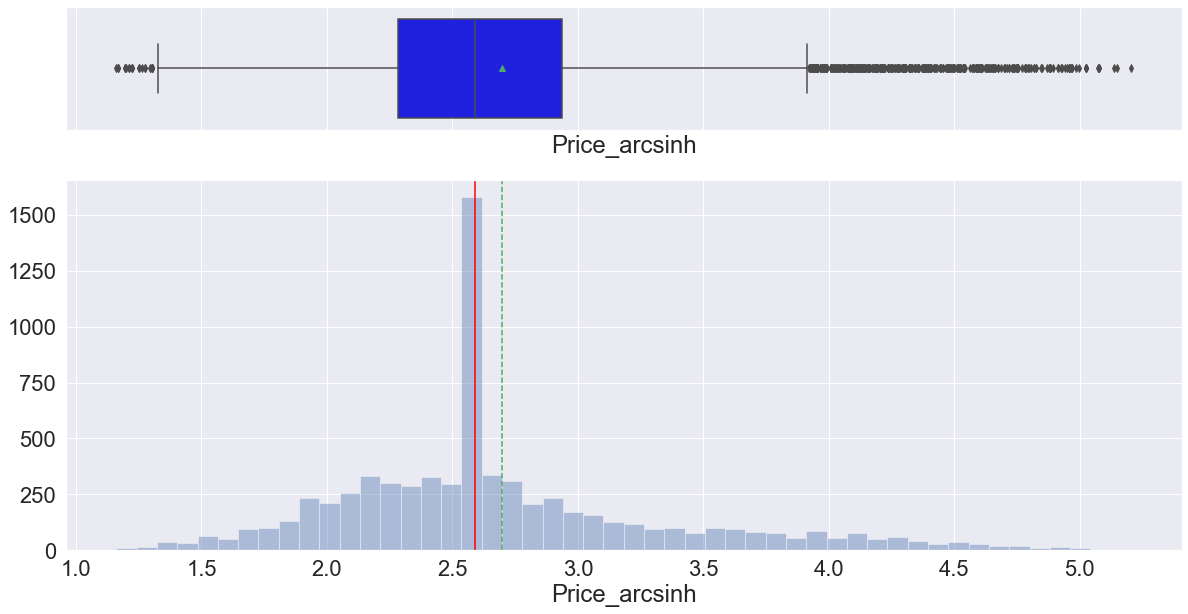

In [56]:
hist_boxplot(df['Price_arcsinh'])

In [57]:
df[df.columns[:]].corr()["Price_arcsinh"][:]

S.No.                       -0.059521
Kilometers_Driven           -0.040633
Mileage                     -0.253999
Engine                       0.640010
Location_North              -0.066020
Location_South               0.217228
Location_West               -0.059706
Owner_Type_Fourth & Above   -0.027662
Owner_Type_Second           -0.113491
Owner_Type_Third            -0.110079
Transmission_Manual         -0.578511
Car_Age                     -0.427886
Price_arcsinh                1.000000
Name: Price_arcsinh, dtype: float64

### Data Preparation for Model

In [58]:
X = df.drop("Price_arcsinh", axis=1)
y = df[["Price_arcsinh"]]

print(X.head())
print(y.head())

   S.No.  Kilometers_Driven  Mileage  Engine  Location_North  Location_South  \
0      0              72000    26.60   998.0               0               0   
1      1              41000    19.67  1582.0               0               0   
2      2              46000    18.20  1199.0               0               0   
3      3              87000    20.77  1248.0               0               0   
4      4              40670    15.20  1968.0               0               1   

   Location_West  Owner_Type_Fourth & Above  Owner_Type_Second  \
0              1                          0                  0   
1              1                          0                  0   
2              0                          0                  0   
3              0                          0                  0   
4              0                          0                  1   

   Owner_Type_Third  Transmission_Manual  Car_Age  
0                 0                    1       11  
1                 

In [59]:
print(X.shape)
print(y.shape)

(7247, 12)
(7247, 1)


In [60]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

### Choose, Train and Evaluate Model

In [61]:
# fitting the linear regression model on the train data (70% of the whole data)

linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

### Let us now make predictions on the test set (X_test) with the model, and compare the actual output values with the predicted values.

In [62]:
# predictions on the test set
pred = linearregression.predict(X_test)

df = pd.DataFrame({"Actual Price": y_test.values.flatten(), "Predicted Price": pred.flatten()})
df

,Actual Price,Predicted Price
0,2.369637,2.347114
1,2.712465,2.411969
2,2.230814,2.393744
3,4.284604,3.571369
4,2.367782,2.934136
...,...,...
2170,2.722983,3.198419
2171,3.850600,3.314908
2172,2.591882,2.661649
2173,3.497425,3.286046


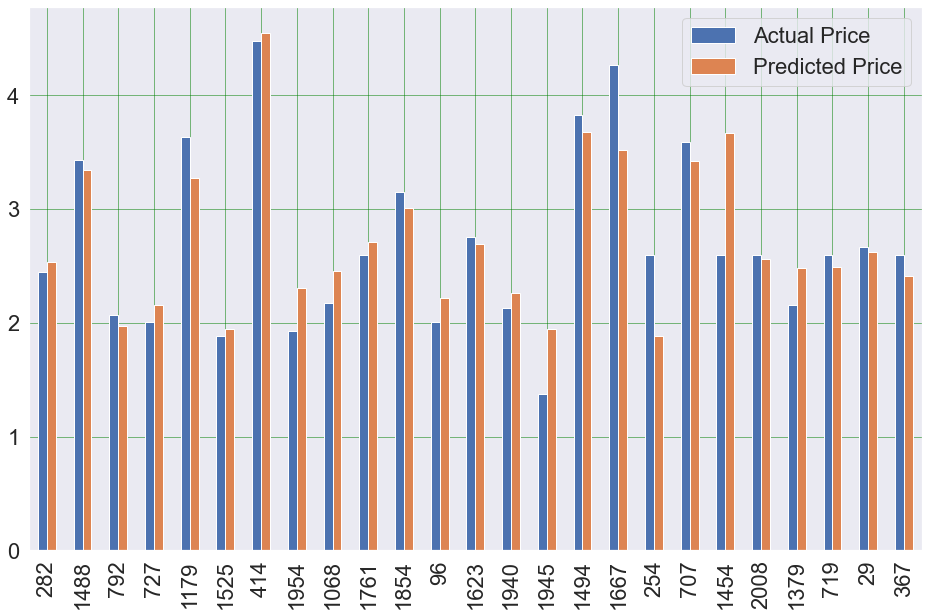

In [63]:
np.random.seed(42)
df1 = df.sample(25)
df1.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

##### Observations
- Our model has returned pretty good predictions on the test data X_Test and the "Actual Price" and "Predicted Price" are comparable. 

In [64]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [65]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
print(model_perf(linearregression, X_train, y_train))

Training Performance

        MAE       MAPE      RMSE       R^2
0  0.276136  10.355179  0.373363  0.684923


In [66]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
print(model_perf(linearregression, X_test, y_test))

Test Performance

        MAE       MAPE      RMSE      R^2
0  0.278279  10.295703  0.376152  0.69823


##### Observations
- The training and testing $R^2$ are 0.684 and 0.698 respectively, both scores are comparable. The model is a good fit.
- $R^2$ is 0.698, meaning the model explains 69.8% of the total variation in the test set. Overall, the model is very satisfactory.

In [67]:
# Here are the coefficients for each variable and the intercept
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearregression.coef_[0][idx]))

The coefficient for S.No. is -1.2783957611736846e-05
The coefficient for Kilometers_Driven is 1.4924518166778943e-08
The coefficient for Mileage is 0.0017197329969157822
The coefficient for Engine is 0.0006003482606737421
The coefficient for Location_North is 0.016743233447049286
The coefficient for Location_South is 0.12896485430075047
The coefficient for Location_West is 0.03904911372713214
The coefficient for Owner_Type_Fourth & Above is 0.07000607933819633
The coefficient for Owner_Type_Second is -0.03197848588785372
The coefficient for Owner_Type_Third is -0.13560442265157152
The coefficient for Transmission_Manual is -0.3940001311303794
The coefficient for Car_Age is -0.08068710133016582


In [68]:
intercept = linearregression.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.5831460381956113


### Adding Interaction Terms

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.7650054830164111


In [70]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.7761251922721655


In [71]:
# but this improves as the cost of 67 extra variables!
print(X_train.shape)
print(X_train2.shape)

(5072, 12)
(5072, 79)


Polynomial Features have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly.

In [72]:
import statsmodels.api as sm

X = sm.add_constant(X)

linearmodel = sm.OLS(y, X).fit()

print_model = linearmodel.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          Price_arcsinh   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1339.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:28:07   Log-Likelihood:                -3154.5
No. Observations:                7247   AIC:                             6335.
Df Residuals:                    7234   BIC:                             6425.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [73]:
# write your own R-square function for the testing data

def r_squared(model, X, y):
    y_mean = y_train.mean()
    SST = ((y_train - y_mean)**2).sum()
    SSE = ((y_train - linearregression.predict(X_train))**2).sum()
    r_square = 1 - SSE/SST
    return SSE, SST, r_square
    
SSE, SST, r_square = r_squared(linearregression, X_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)

SSE:  Price_arcsinh    707.035099
dtype: float64
SST:  Price_arcsinh    2244.007274
dtype: float64


## Interpreting the Regression Results:
1. **Adjusted. R-squared**: It reflects the fit of the model.
- Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- In our case, the value for Adj. R-squared is 0.689, which is good!


2. ***const* coefficient**: It is the Y-intercept.
- It means that if all the dependent variable (features like *Mileage*, *Car Age*, *Engine* and so on) coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for *const* coefficient is **2.6114**
    
    
3. **Coefficient of an independent variable**: It represents the change in the output Y due to a change in the independent variable (everything else held constant).
- For every unit increase in Car Age price of the car decreases by -0.0831
- For every unit increase in Owner Type Second the price of the car decreases by -0.0193 
- For every unit increase in Owner Type Third the price of the car decreases by -0.1075
- For every unit increase in Owner Type Fourth and Above the price of the car increases by 0.1565 
- For every unit increase in Engine the price of the car increases by 0.0006
- For every unit increase in Mileage the price of the car increases by 0.0020
- For every unit increase in Location South the price of the car increases by 0.1227


4. **std err**: It reflects the level of accuracy of the coefficients.
- The majority of sts erros for all variables are low numbers. 
- We have a high accuracy level with our model


5. **P>|t|**: It is p-value.
        - $H_o$ : Car Age feature is not significant ($\beta_i = 0$)
        - $H_a$ : Car Age feature is that it is significant ($\beta_i \neq 0$)
        - p value = 0.00
        - We reject the null hypothesis and say Car Age is significant
        

6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

## Conclusions
- Used cars prices are highly correlated to Car Age, Engine, Owner Type, Mileage, Location South
- The older the car is the price decreases by -0.0831
- If a car has had two owners the price decreases by -0.0193
- If a car has had three owners the price decreases by -0.1075
- If a car has a powerful engine the price increases by 0.0006
- If a car saves gas per miles the price increases by 0.0020
- Cars sold in the South region have a price increase of 0.1227 because they are buying newer cars 

## Reservations
- The model has an accuracy of In Sample R^2 0.7650054830164111 and Out of Sample R^2 0.7761251922721655 after adding interaction terms. 
- The model improves at the cost of increasing the number of variables significantly
- Performance on Train Set 70% = 0.684923
- Performance of Test Set 30% = 0.69823
- This model was created based on the arcsinh of price in order to obtain a close to normal distribution